In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Reading the Dataset

In [7]:
# Since the data is stored in excel file, use pd.read_excel to load the data into the dataframe
df_train=pd.read_excel('Dataset/Data_Train.xlsx')

In [10]:
# Create a copy of the original data frame
train_dataset=df_train.copy()

In [12]:
# Display all the columns in the data set
pd.set_option('display.max_columns', None)

In [14]:
# Read the first 5 rows in the training data set. 
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
train_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [18]:
# get information about the columns in the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [20]:
# We can see few missing records. Since we have 1 missing record out of 10000, we can drop the rows with the missing values
df_train.dropna(inplace=True)

In [22]:
df_train.shape

(10682, 11)

In [24]:
# Check for null values now
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

In [27]:
# From df_train.info(), it is clear that Date_of_Journey is of object data type
# We convert this column into a timestamp so that we can use this column in our prediction
df_train['Journey_day']=pd.to_datetime(df_train.Date_of_Journey, format='%d/%m/%Y').dt.day
df_train['Journey_month']=pd.to_datetime(df_train.Date_of_Journey, format='%d/%m/%Y').dt.month
df_train['Journey_year']=pd.to_datetime(df_train.Date_of_Journey, format='%d/%m/%Y').dt.year
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [29]:
# Drop the Date_of_Journey as we have extracted all the useful information from it
df_train.drop('Date_of_Journey', axis=1, inplace=True)  

In [31]:
# get a description of the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Journey_day      10682 non-null  int32 
 11  Journey_month    10682 non-null  int32 
 12  Journey_year     10682 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 1.0+ MB


In [33]:
# Check out for how many years this dataset holds the information for
df_train['Journey_year'].value_counts()

Journey_year
2019    10682
Name: count, dtype: int64

The dataset only contains flight price information for one year - 2019

In [36]:
# Departure time is when a plane leaves the gate
# Similar pre-processing for Departure time
# From df_train.info(), it is clear that Dep_Time is of object data type
# We convert this column into a timestamp so that we can use this column in our prediction
df_train['Departure_Hour']=pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['Departure_Minute']=pd.to_datetime(df_train.Dep_Time).dt.minute

# Drop the Date_of_Journey as we have extracted all the useful information from it
df_train.drop('Dep_Time', axis=1, inplace=True)  

C:\Users\tejus\AppData\Local\Temp\ipykernel_17516\1735297976.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['Departure_Hour']=pd.to_datetime(df_train.Dep_Time).dt.hour
C:\Users\tejus\AppData\Local\Temp\ipykernel_17516\1735297976.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['Departure_Minute']=pd.to_datetime(df_train.Dep_Time).dt.minute


In [38]:
# get first 5 records
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [40]:
# Arrival time is when the plane pulls up to the gate
# Similar pre-processing for Arrival time
# From df_train.info(), it is clear that Arrival_Time is of object data type
# We convert this column into a timestamp so that we can use this column in our prediction
df_train['Arrival_Hour']=pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['Arrival_Minute']=pd.to_datetime(df_train.Arrival_Time).dt.minute

# Drop the Date_of_Journey as we have extracted all the useful information from it
df_train.drop('Arrival_Time', axis=1, inplace=True)  

C:\Users\tejus\AppData\Local\Temp\ipykernel_17516\128392456.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['Arrival_Hour']=pd.to_datetime(df_train.Arrival_Time).dt.hour
C:\Users\tejus\AppData\Local\Temp\ipykernel_17516\128392456.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['Arrival_Minute']=pd.to_datetime(df_train.Arrival_Time).dt.minute


In [42]:
# get first 5 records
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [44]:
# Duration is the time taken to complete the journey
durations=list(df_train['Duration'])

for i in range(len(durations)):
    # For a particular entry, if there are no spaces, i.e. only has hours (2h) or minutes (50m)
    if len(durations[i].split())!=2: 
        if 'h' in durations[i]:
            durations[i]=durations[i] + " 0m"
        else:
            durations[i] = '0h '+ durations[i]

duration_hour=[duration.split('h')[0] for duration in durations]
duration_minutes=[duration.split()[1][:-1] for duration in durations]

# Create new columns - Duration_Hours and Duration_Minutes
df_train['Duration_Hours']=duration_hour
df_train['Duration_Minutes']=duration_minutes

# Drop the Duration as we have extracted all the useful information from it
df_train.drop('Duration', axis=1, inplace=True) 

In [46]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [48]:
# get info about the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10682 non-null  object
 6   Price             10682 non-null  int64 
 7   Journey_day       10682 non-null  int32 
 8   Journey_month     10682 non-null  int32 
 9   Journey_year      10682 non-null  int32 
 10  Departure_Hour    10682 non-null  int32 
 11  Departure_Minute  10682 non-null  int32 
 12  Arrival_Hour      10682 non-null  int32 
 13  Arrival_Minute    10682 non-null  int32 
 14  Duration_Hours    10682 non-null  object
 15  Duration_Minutes  10682 non-null  object
dtypes: int32(7), int64(1), object(8)
memory usage: 1.1+ MB


## Handling Categorical Data

We use OneHotEncoder for nominal data


LabelEncoder for Ordinal Data

In [53]:
df_train['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

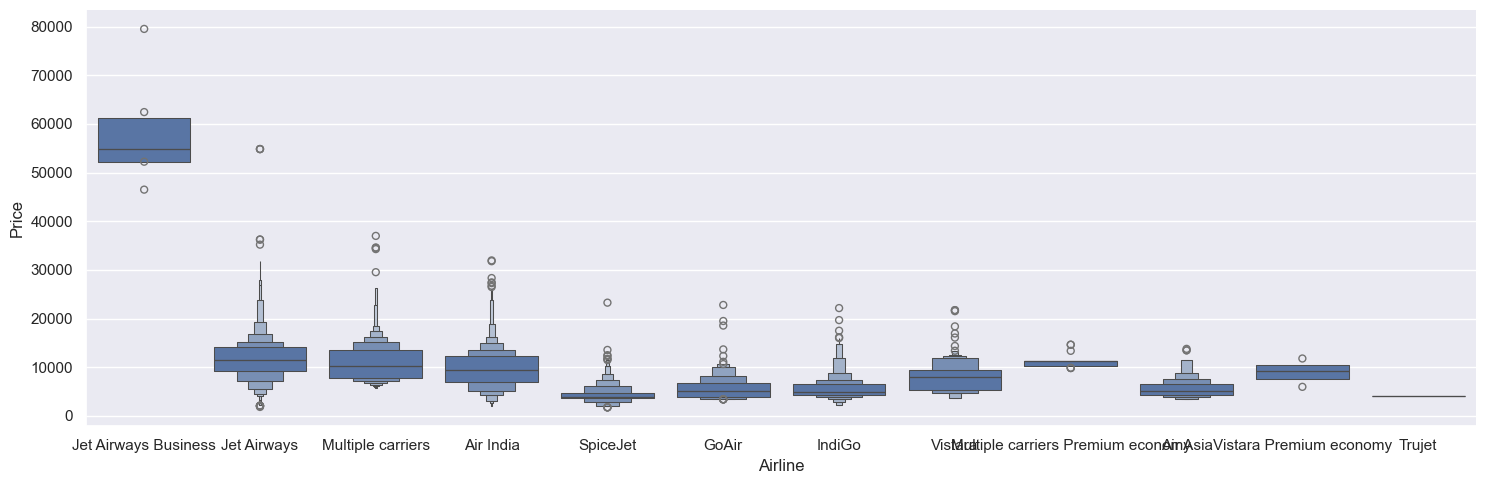

In [55]:
# Airlines vs Price
sns.catplot(y='Price', x='Airline', data=df_train.sort_values('Price', ascending=False), kind='boxen', height=5, aspect=3)
plt.show()

In [56]:
 # As airline is nominal data we will perform one hot encoding
airlines=df_train[['Airline']]
# drop_first = True => For 11 options, create 10 (11-1) dummy variables
airlines=pd.get_dummies(airlines, drop_first=True)
airlines

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,True,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,True,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,True,False


In [58]:
# Find which airport is the most common source airport in our dataset
df_train['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

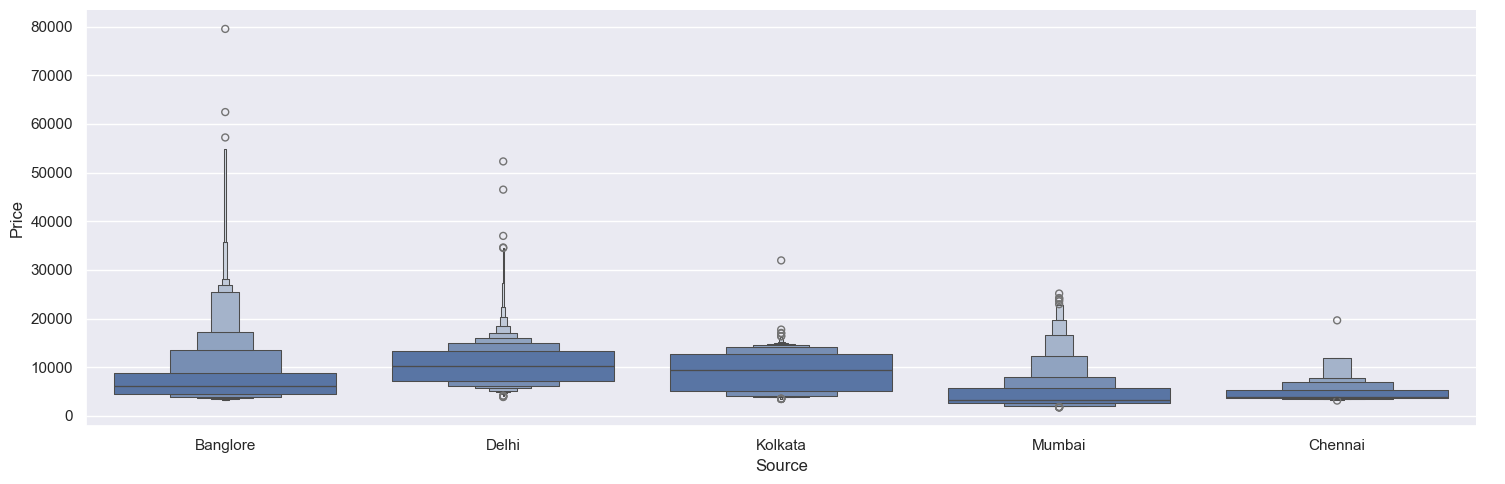

In [61]:
# Source vs Price
sns.catplot(y='Price', x='Source', data=df_train.sort_values('Price', ascending=False), kind='boxen', height=5, aspect=3)
plt.show()

In [63]:
# As source is nominal categorical data perform OneHotEncoding
Source=df_train[['Source']]
# drop_first = True => For 11 options, create 10 (11-1) dummy variables
Source=pd.get_dummies(Source, drop_first=True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False
...,...,...,...,...
10678,False,False,True,False
10679,False,False,True,False
10680,False,False,False,False
10681,False,False,False,False


In [65]:
# Find which airport is the most common source airport in our dataset
df_train['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

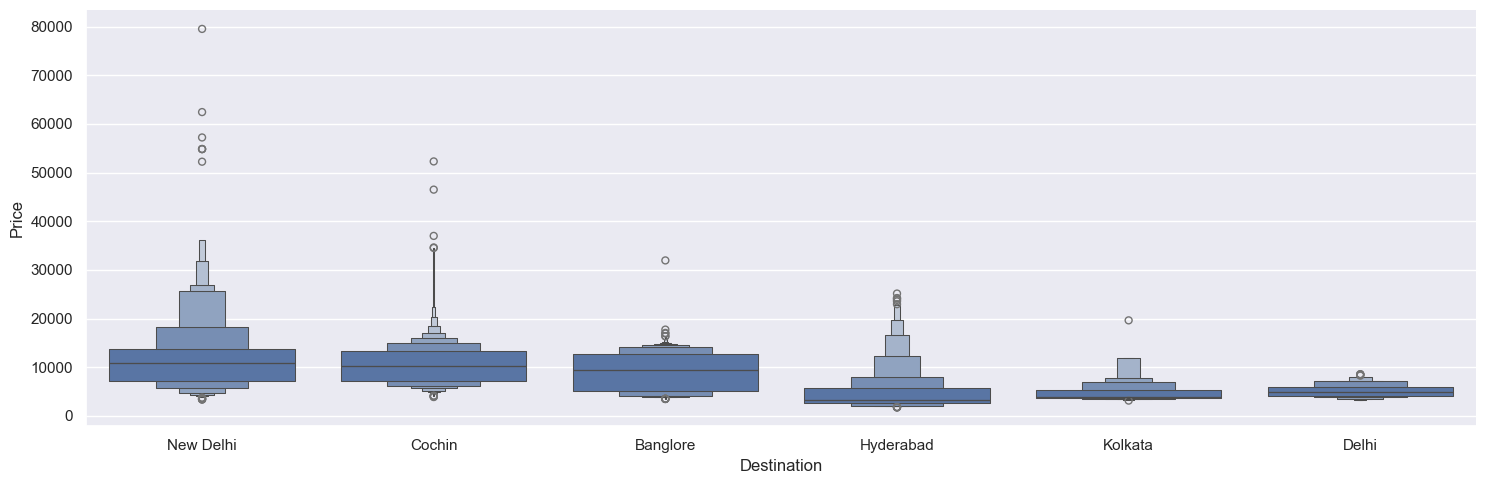

In [67]:
# Destination vs Price
sns.catplot(y='Price', x='Destination', data=df_train.sort_values('Price', ascending=False), kind='boxen', height=5, aspect=3)
plt.show()

In [69]:
# New Delhi and Delhi airports denote the same airport system. So there shouldn't be separate entries for Delhi and New Delhi.
dest=list(df_train['Destination'])
for i in range(len(dest)):
    if dest[i]=='New Delhi':
        dest[i]='Delhi'

df_train['Destination']=dest

# As destination is nominal categorical data perform OneHotEncoding
Destination=df_train[['Destination']]

# drop_first = True => For 11 options, create 10 (11-1) dummy variables
Destination=pd.get_dummies(Destination, drop_first=True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,False,True,False,False
1,False,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
...,...,...,...,...
10678,False,False,False,False
10679,False,False,False,False
10680,False,True,False,False
10681,False,True,False,False


In [71]:
# Route and Total Stops columns are related. We can determine total stops from route column. Thus, we have to drop one column
df_train.drop('Route', axis=1, inplace=True)

In [73]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [77]:
df_train['Additional_Info'].value_counts()


Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [79]:
# No Info and No info are the same
additional_info=list(df_train['Additional_Info'])
for i in range(len(additional_info)):
    if additional_info[i]=='No Info':
        additional_info[i]='No info'

df_train['Additional_Info']=additional_info

In [81]:
df_train['Additional_Info'].value_counts()


Additional_Info
No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [83]:
# As Additional_Info is nominal categorical data, perform OneHotEncoding
Additional_Info=df_train[['Additional_Info']]
# drop_first = True => For 11 options, create 10 (11-1) dummy variables
Additional_Info=pd.get_dummies(Additional_Info, drop_first=True)
Additional_Info

,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,True,False
10679,False,False,False,False,False,False,True,False
10680,False,False,False,False,False,False,True,False
10681,False,False,False,False,False,False,True,False


In [85]:
df_train['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [87]:
# Since total_stops is ordinal data, we will peform label encoding
# Values are assigned with corresponding keys
df_train.replace({"non-stop":0, "1 stop":1, "2 stops": 2, "3 stops":3, "4 stops":4}, inplace=True)

C:\Users\tejus\AppData\Local\Temp\ipykernel_17516\2317719087.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace({"non-stop":0, "1 stop":1, "2 stops": 2, "3 stops":3, "4 stops":4}, inplace=True)


In [89]:
# Concatenate dataframes 
df_train=pd.concat([df_train, airlines, Source, Destination, Additional_Info], axis=1)
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,Banglore,Delhi,0,No info,3897,24,3,2019,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,IndiGo,Banglore,Delhi,1,No info,13302,1,3,2019,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [91]:
# Drop the Airline, Source, Destination, Additional_Info as they have already been encoded
df_train.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1, inplace=True)

In [93]:
df_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,2019,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,2,7662,1,5,2019,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2,13882,9,6,2019,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
3,1,6218,12,5,2019,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1,13302,1,3,2019,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [95]:
df_train.shape

(10682, 38)

We pre-process train and test dataset separately to avoid data leakage - Some info from test set can enter training set

# Test Set

In [100]:
# Since the data is stored in excel file, use pd.read_excel to load the data into the dataframe
df_test=pd.read_excel('Dataset/Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [102]:
# Repeat the same process here

# We convert this column into a timestamp so that we can use this column in our prediction
df_test['Journey_day']=pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y').dt.day
df_test['Journey_month']=pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y').dt.month
df_test['Journey_year']=pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y').dt.year

# Drop the Date_of_Journey as we have extracted all the useful information from it
df_test.drop('Date_of_Journey', axis=1, inplace=True)  
# Check out for how many years this dataset holds the information for
df_test['Journey_year'].value_counts()

Journey_year
2019    2671
Name: count, dtype: int64

In [104]:
# Departure time is when a plane leaves the gate
# Similar pre-processing for Departure time
# We convert this column into a timestamp so that we can use this column in our prediction
df_test['Departure_Hour']=pd.to_datetime(df_test.Dep_Time).dt.hour
df_test['Departure_Minute']=pd.to_datetime(df_test.Dep_Time).dt.minute

# Drop the Date_of_Journey as we have extracted all the useful information from it
df_test.drop('Dep_Time', axis=1, inplace=True)  

# Arrival time is when the plane pulls up to the gate
# Similar pre-processing for Arrival time
# We convert this column into a timestamp so that we can use this column in our prediction
df_test['Arrival_Hour']=pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['Arrival_Minute']=pd.to_datetime(df_test.Arrival_Time).dt.minute

# Drop the Date_of_Journey as we have extracted all the useful information from it
df_test.drop('Arrival_Time', axis=1, inplace=True)  

# Duration is the time taken to complete the journey
durations=list(df_test['Duration'])

for i in range(len(durations)):
    # For a particular entry, if there are no spaces, i.e. only has hours (2h) or minutes (50m)
    if len(durations[i].split())!=2: 
        if 'h' in durations[i]:
            durations[i]=durations[i] + " 0m"
        else:
            durations[i] = '0h '+ durations[i]

duration_hour=[duration.split('h')[0] for duration in durations]
duration_minutes=[duration.split()[1][:-1] for duration in durations]

# Create new columns - Duration_Hours and Duration_Minutes
df_test['Duration_Hours']=duration_hour
df_test['Duration_Minutes']=duration_minutes

# Drop the Duration as we have extracted all the useful information from it
df_test.drop('Duration', axis=1, inplace=True) 

 # As airline is nominal data we will perform one hot encoding
airlines=df_test[['Airline']]
# drop_first = True => For 11 options, create 10 (11-1) dummy variables
airlines=pd.get_dummies(airlines, drop_first=True)

# As source is nominal categorical data perform OneHotEncoding
Source=df_test[['Source']]
# drop_first = True => For 11 options, create 10 (11-1) dummy variables
Source=pd.get_dummies(Source, drop_first=True)

# New Delhi and Delhi airports denote the same airport system. So there shouldn't be separate entries for Delhi and New Delhi.
dest=list(df_test['Destination'])
for i in range(len(dest)):
    if dest[i]=='New Delhi':
        dest[i]='Delhi'

df_test['Destination']=dest

# As destination is nominal categorical data perform OneHotEncoding
Destination=df_test[['Destination']]
# drop_first = True => For 11 options, create 10 (11-1) dummy variables
Destination=pd.get_dummies(Destination, drop_first=True)

# No Info and No info are the same
additional_info=list(df_test['Additional_Info'])
for i in range(len(additional_info)):
    if additional_info[i]=='No Info':
        additional_info[i]='No info'

df_test['Additional_Info']=additional_info

# As Additional Info is nominal categorical data perform OneHotEncoding
Additional_Info=df_test[['Additional_Info']]
# drop_first = True => For 11 options, create 10 (11-1) dummy variables
Additional_Info=pd.get_dummies(Additional_Info, drop_first=True)
Additional_Info

# Route and Total Stops columns are related. We can determine total stops from route column. Thus, we have to drop one column
df_test.drop('Route', axis=1, inplace=True)

# Since total_stops is ordinal data, we will peform label encoding
# Values are assigned with corresponding keys
df_test.replace({"non-stop":0, "1 stop":1, "2 stops": 2, "3 stops":3, "4 stops":4}, inplace=True)

# Concatenate dataframes
df_test=pd.concat([df_test, airlines, Source, Destination, Additional_Info], axis=1)

# Drop the Airline, Source, Destination, Additional_Info as they have already been encoded
df_test.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1, inplace=True)

df_test.head()

C:\Users\tejus\AppData\Local\Temp\ipykernel_17516\467720749.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Departure_Hour']=pd.to_datetime(df_test.Dep_Time).dt.hour
C:\Users\tejus\AppData\Local\Temp\ipykernel_17516\467720749.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Departure_Minute']=pd.to_datetime(df_test.Dep_Time).dt.minute
C:\Users\tejus\AppData\Local\Temp\ipykernel_17516\467720749.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Arrival_Hour']=pd.to_datetime(df_test.Arrival_Time).dt.hour
C:\Users\tejus\AppData\Local\Temp\ip

,Total_Stops,Journey_day,Journey_month,Journey_year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info
0,1,6,6,2019,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
1,1,12,5,2019,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
2,1,21,5,2019,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False
3,1,21,5,2019,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
4,0,24,6,2019,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [106]:
df_test.shape

(2671, 33)

In [108]:
# 4 columns are missing. That is the test dataset does not contain info about the 4 missing dummy variables -
# - Additional_Info_1 Short layover
# - Additional_Info_2 Long layover
# - Additional_Info_Red-eye flight
# - Airline_Trujet
# Set these columns to zero
# Insert Airline_Trujet at column 18
df_test.insert(18, 'Airline_Trujet', False)


In [110]:
# Insert Airline_Trujet at 8th last column 
df_test.insert(29, 'Additional_Info_1 Short layover', False)


In [112]:
# Insert Airline_Trujet at 7th last column
df_test.insert(30, 'Additional_Info_2 Long layover', False)


In [114]:
# Insert Airline_Trujet at last column
df_test['Additional_Info_Red-eye flight']=False

In [116]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,1,6,6,2019,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,1,12,5,2019,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2,1,21,5,2019,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,1,21,5,2019,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
4,0,24,6,2019,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [120]:
df_test.shape

(2671, 37)

# Feature Selection

Finding out the best features which will contribute the most towards the target variable

Some of the feature selection methods:

1. heatmap
2. feature_importance_
3. SelectKBest

In [124]:
df_train.shape

(10682, 38)

In [126]:
# Get all the columns in the dataframe
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hours', 'Duration_Minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info

In [128]:
# get a list of independent variables. All except Price
independent_vars=['Total_Stops', 'Journey_day', 'Journey_month', 'Journey_year',
       'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hours', 'Duration_Minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight']

In [130]:
# Create dataframe containing the independent variables only
X=df_train[independent_vars]
X.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,24,3,2019,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,2,1,5,2019,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2,9,6,2019,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
3,1,12,5,2019,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1,1,3,2019,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [132]:
# The shape of the X dataframe
X.shape

(10682, 37)

In [134]:
# Create a dataframe for price
y=df_train[['Price']]
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


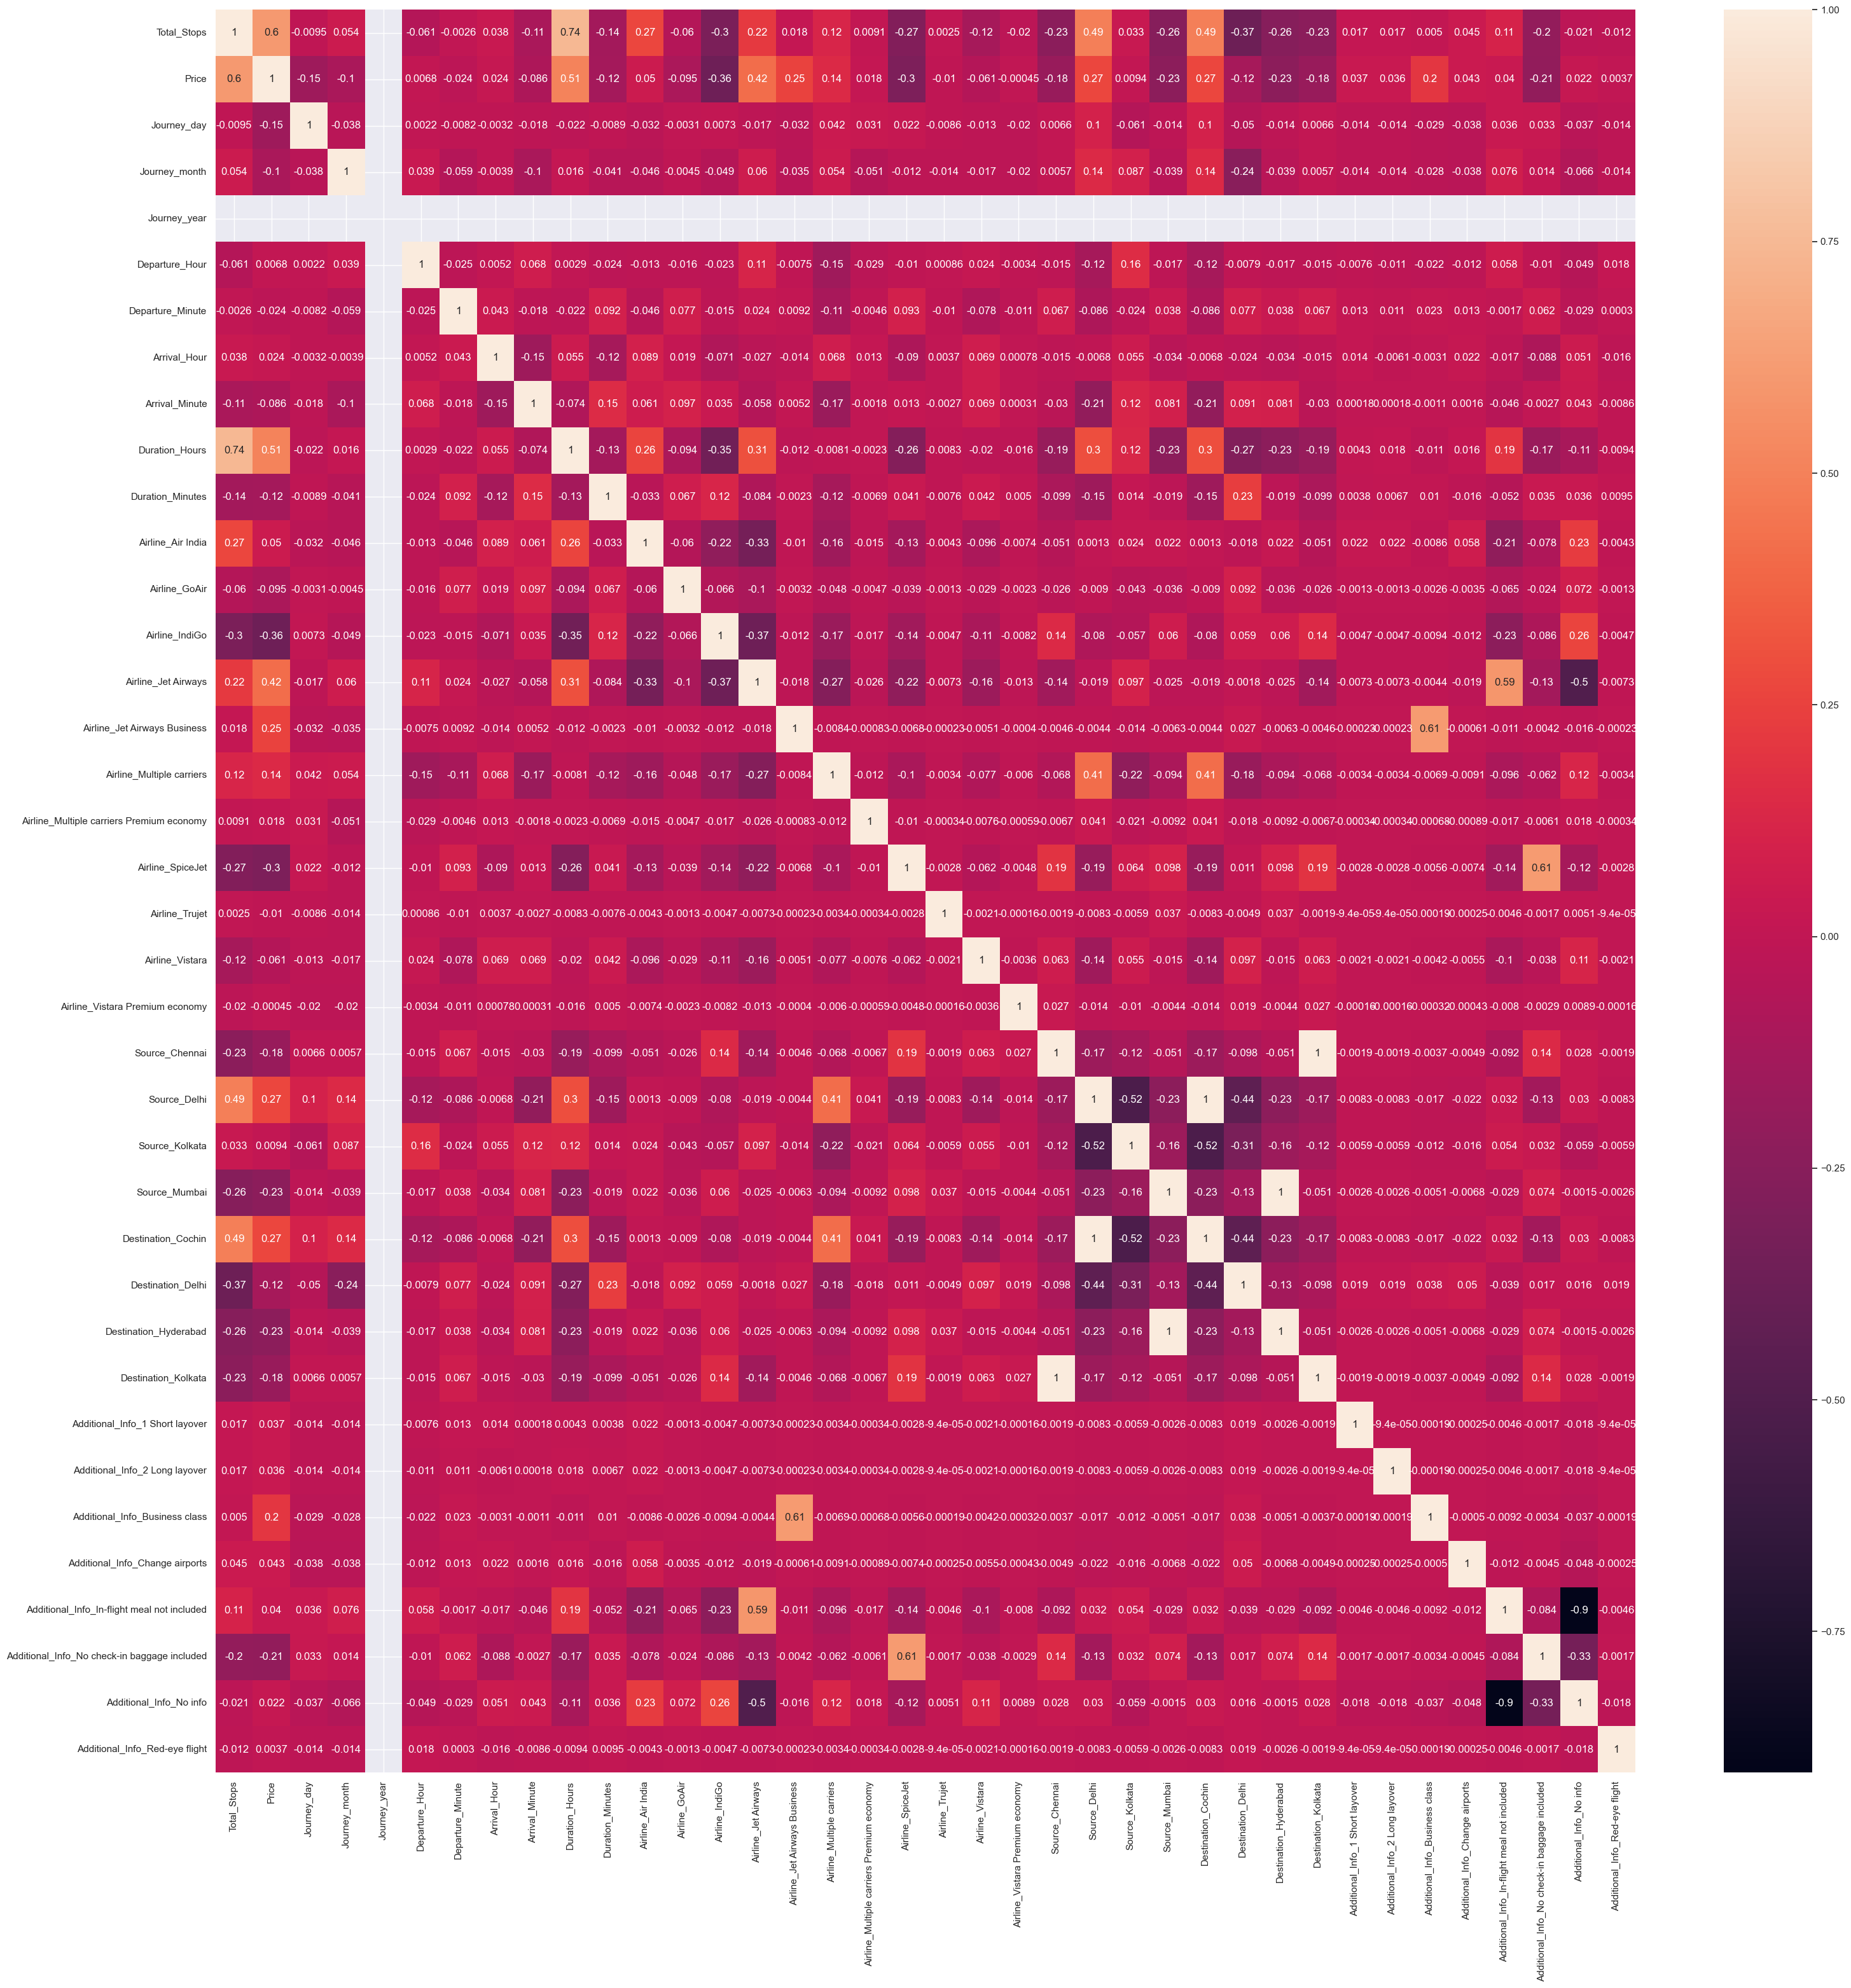

In [136]:
# Find correlation between independent and dependent variables
plt.figure(figsize=(36, 36))
sns.heatmap(df_train.corr(), annot=True)

plt.show()

In [137]:
# Important Feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X, y)

C:\Users\tejus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

In [138]:
selection.feature_importances_

array([2.32051310e-01, 9.57470543e-02, 5.44891155e-02, 0.00000000e+00,
       2.04071710e-02, 1.89968773e-02, 2.36867392e-02, 1.60471339e-02,
       1.16843736e-01, 1.49876743e-02, 1.02334898e-02, 1.70933376e-03,
       1.72032459e-02, 1.31996795e-01, 6.45923619e-02, 1.91352996e-02,
       8.45766333e-04, 5.03332728e-03, 1.08273921e-04, 4.63832880e-03,
       6.06281862e-05, 5.94359217e-04, 1.35207074e-02, 5.36679415e-03,
       5.74983243e-03, 6.42510543e-03, 2.54346049e-02, 5.37554698e-03,
       6.57534742e-04, 9.18101342e-05, 9.68757521e-05, 1.07102357e-03,
       8.29391125e-04, 7.93196239e-02, 4.29485484e-05, 6.57937629e-03,
       3.08023941e-05])

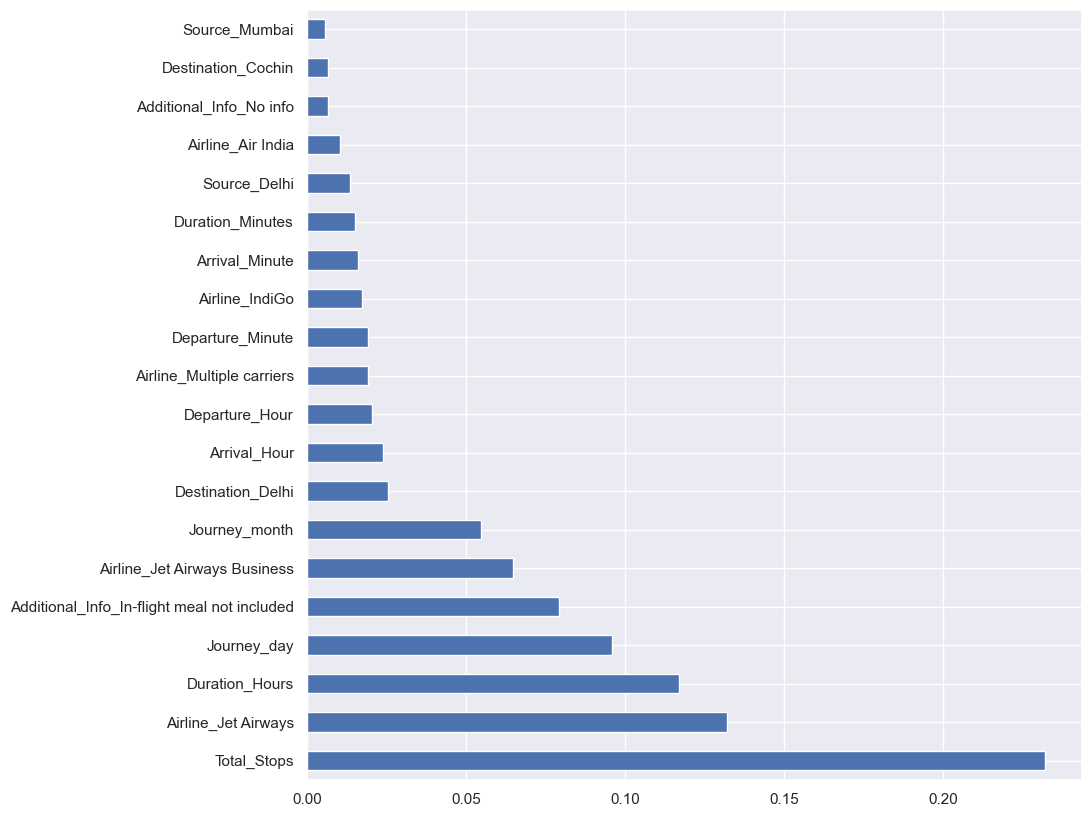

In [139]:
# plot graph of feature importances for better visualization

plt.figure(figsize=(10, 10))
feature_importances=pd.Series(selection.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

# Random Forest

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train, y_train)

C:\Users\tejus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [144]:
y_pred=reg_rf.predict(X_test)

In [145]:
reg_rf.score(X_train, y_train)

0.9820782595801925

In [153]:
reg_rf.score(X_test, y_test)

0.8721406759478849

In [155]:
type(y_test)

pandas.core.frame.DataFrame

In [157]:
type(y_pred)

numpy.ndarray

In [159]:
from sklearn import metrics

In [161]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))

MAE:  653.0439804372693
MSE:  2756909.9467809587
RMSE:  1660.3945154031794
R2:  0.8721406759478849


# Hyperparameter Tuning

In [164]:
from sklearn.model_selection import RandomizedSearchCV

In [166]:
# Randomized Search CV

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1, stop=1200, num=12)]
# Number of features to consider at every split
max_features=[None, 'sqrt']
# maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(1, 38)]
# Minimum number of samples required to split a node
min_sample_split=[2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [168]:
# Create the random grid

random_grid={'n_estimators':n_estimators, 
             'max_features':max_features, 
             'max_depth':max_depth, 
             'min_samples_split':min_sample_split, 
             'min_samples_leaf':min_samples_leaf}
             

In [170]:
# Random search of parameters, using 5 fold cross validation
rf_random=RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42, n_jobs=-1)

In [172]:
y_train_arr=np.array(y_train).reshape(len(y_train))

# Train the model
rf_random.fit(X_train, y_train_arr)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 1, 2, 3, 4, 4, 5, 6, 7,
                                                      7, 8, 9, 10, 10, 11, 12,
                                                      13, 13, 14, 15, 16, 16,
                                                      17, 18, 19, 19, 20, 21,
                                                      22, 22, ...],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [1, 110, 219, 328, 437,
                                                         546, 655, 764, 873,
                                                         982, 1091, 1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [174]:
rf_random.best_params_

{'n_estimators': 219,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 35}

In [205]:
y_test_arr=np.array(y_test).reshape(len(y_test))
y_test_arr.shape

(2137,)

In [207]:
prediction=rf_random.predict(X_test)
prediction.shape

(2137,)

In [180]:
print('Real y: ', y_test_arr)
print('Predicted y: ', prediction)

Real y:  [16655  4959  9187 ...  7452  8824 14151]
Predicted y:  [16976.24569562  5664.93742097  8660.19984499 ...  6884.18826666
  9792.3402048  13580.12242808]


In [182]:
type(y_test_arr)

numpy.ndarray

In [184]:
type(prediction)

numpy.ndarray

In [186]:
print('MAE: ', metrics.mean_absolute_error(y_test, prediction))
print('MSE: ', metrics.mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2: ', metrics.r2_score(y_test, prediction))

MAE:  743.0582354214088
MSE:  2922746.986468148
RMSE:  1709.6043362334303
R2:  0.8644495245477581


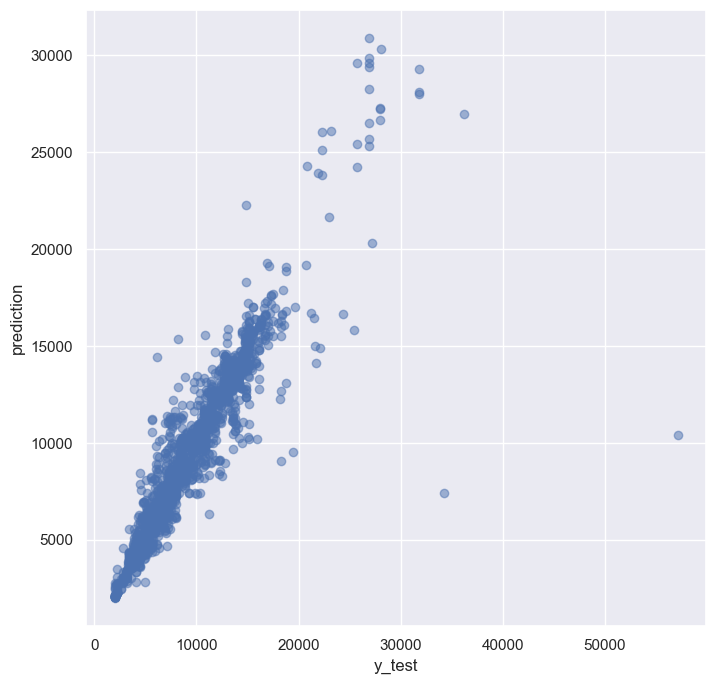

In [211]:
# Plot scatter plot of predicted vs real
plt.figure(figsize=(8,8))
plt.scatter(y_test_arr, prediction, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()

In [188]:
X_train.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Journey_year',
       'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hours', 'Duration_Minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye 

In [190]:
df_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Journey_year',
       'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hours', 'Duration_Minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye 

In [194]:
predicted_flight_fare=rf_random.predict(df_test)

In [197]:
predicted_flight_fare

array([14587.49779539,  4208.64388612, 12897.21017111, ...,
       16066.56531348, 14055.78516057,  7886.21618783])

# Save the model and use it again

In [214]:
import pickle

# open the file where you want to store the data
file=open('flight_rf.pkl', 'wb')

# dump inofrmation to that file
pickle.dump(rf_random, file)

In [216]:
model=open('flight_rf.pkl', 'rb')
forest=pickle.load(model)

In [218]:
y_prediction=forest.predict(X_test)

In [220]:
metrics.r2_score(y_test_arr, y_prediction)

0.8644495245477581